<a href="https://colab.research.google.com/github/paviayyala/AIML-Lab/blob/main/Week4_NLP_Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Week 4 — NLP Basics (Google Colab Notebook)
Hands-on programs with **clear comments** that connect to Week 3 (DL) and Week 1–2 (Stats & ML).

**What you'll learn this week:**
- Day 16: **Text Preprocessing** (tokenization, stopwords, BoW/TF-IDF) + top words
- Day 17: **Naïve Bayes Text Classification** (simple corpus)
- Day 18: **Logistic Regression for Sentiment** (tiny custom dataset)
- Day 19: **RNN/LSTM Language Modeling** (character-level next-char)
- Day 20: **Mini Project** (TF-IDF + Logistic Regression pipeline)


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
from collections import Counter

# Sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# TensorFlow/Keras for Day 19
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0



## Day 16 — Text Preprocessing (Tokenization, Stopwords, BoW/TF-IDF)
We create a small corpus, clean it, and build **Bag-of-Words** and **TF-IDF** matrices. Then we show **top words**.


Cleaned samples: ['i loved the new phone the camera is great and battery lasts long', 'this phone is terrible battery died in a day and camera is poor']
BoW shape: (5, 25)
TF-IDF shape: (5, 25)


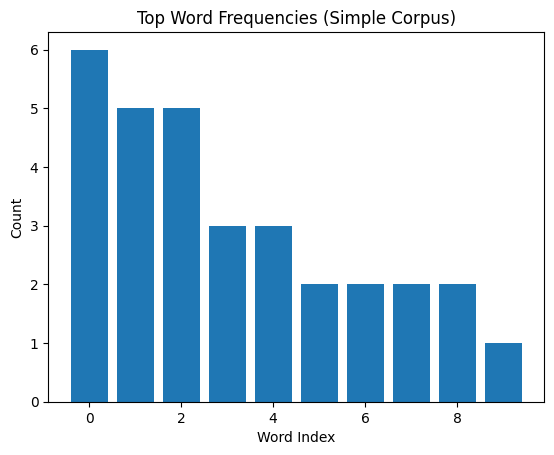

In [ ]:

# --- Day 16: Preprocessing ---
corpus = [
    "I loved the new phone, the camera is great and battery lasts long",
    "This phone is terrible, battery died in a day and camera is poor",
    "Amazing performance and smooth screen; highly recommend this",
    "Not worth the price, very slow and the screen is dull",
    "Battery life is excellent and the camera quality is amazing",
]

# Simple cleaner: lowercase and keep words
def simple_clean(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

cleaned = [simple_clean(t) for t in corpus]
print("Cleaned samples:", cleaned[:2])

# Bag-of-Words
cv = CountVectorizer(stop_words='english')
bow = cv.fit_transform(cleaned)
print("BoW shape:", bow.shape)

# TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_mat = tfidf.fit_transform(cleaned)
print("TF-IDF shape:", tfidf_mat.shape)

# Top words by raw frequency
all_tokens = " ".join(cleaned).split()
freqs = Counter(all_tokens)
top = freqs.most_common(10)
words, counts = zip(*top)

plt.figure()
plt.bar(range(len(words)), counts)
plt.title("Top Word Frequencies (Simple Corpus)")
plt.xlabel("Word Index")
plt.ylabel("Count")
plt.show()



## Day 17 — Naïve Bayes Text Classification (Tiny Corpus)
We label the corpus as **positive/negative** and train **MultinomialNB**.


In [ ]:

# --- Day 17: Naïve Bayes Text Classification ---
labels = np.array([1, 0, 1, 0, 1])  # 1=positive, 0=negative

X_train, X_test, y_train, y_test = train_test_split(cleaned, labels, test_size=0.4, random_state=0, stratify=labels)

vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
Xtr = vec.fit_transform(X_train)
Xte = vec.transform(X_test)

nb = MultinomialNB()
nb.fit(Xtr, y_train)
pred = nb.predict(Xte)

print("Accuracy:", round(accuracy_score(y_test, pred), 3))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))


Accuracy: 0.5
Confusion Matrix:
 [[0 1]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



## Day 18 — Logistic Regression for Sentiment (Custom Dataset)
We create a slightly larger **synthetic review dataset** and train **Logistic Regression**.


In [ ]:

# --- Day 18: Logistic Regression for Sentiment ---
pos_reviews = [
    "Loved it amazing camera and long battery life",
    "Great phone smooth screen and fast performance",
    "Excellent quality totally worth it",
    "Highly recommend this product",
    "Good value for the price"
]

neg_reviews = [
    "Hated it camera is bad and battery dies quickly",
    "Terrible phone slow and laggy not worth the price",
    "Poor quality and bad experience",
    "Do not recommend screen is dull",
    "Waste of money"
]

texts = [simple_clean(t) for t in (pos_reviews + neg_reviews)]
y = np.array([1]*len(pos_reviews) + [0]*len(neg_reviews))

X_train, X_test, y_train, y_test = train_test_split(texts, y, test_size=0.3, random_state=42, stratify=y)

vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=1)
Xtr = vec.fit_transform(X_train)
Xte = vec.transform(X_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(Xtr, y_train)
pred = clf.predict(Xte)

print("Accuracy:", round(accuracy_score(y_test, pred), 3))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))


Accuracy: 0.333
Confusion Matrix:
 [[0 2]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



## Day 19 — RNN/LSTM Language Modeling (Character-Level)
We train a **character-level LSTM** to predict the **next character** in a short text.


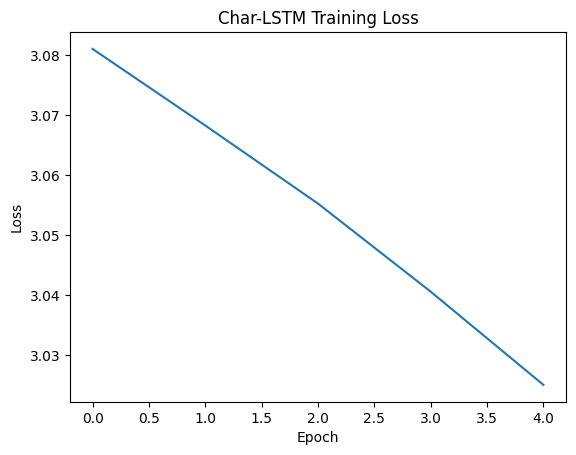

Generated Text:
 twinkle twinkle littpiytmpabmhb
  osaluboawnduhvsvyiwwuyed
rgnsgyamvmttnanesbepy


In [ ]:

# --- Day 19: Char-level LSTM ---
text = """twinkle twinkle little star how i wonder what you are
up above the world so high like a diamond in the sky
twinkle twinkle little star how i wonder what you are"""

# Build vocabulary and mapping
chars = sorted(list(set(text)))
char2idx = {c:i for i,c in enumerate(chars)}
idx2char = {i:c for c,i in char2idx.items()}
seq_len = 20

# Prepare data
X, y = [], []
for i in range(len(text)-seq_len):
    X.append([char2idx[c] for c in text[i:i+seq_len]])
    y.append(char2idx[text[i+seq_len]])
X = np.array(X)
y = np.array(y)

# Train/test split
split = int(0.9*len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# One-hot encode
vocab_size = len(chars)
X_train_oh = keras.utils.to_categorical(X_train, num_classes=vocab_size)
X_test_oh = keras.utils.to_categorical(X_test, num_classes=vocab_size)
y_train_oh = keras.utils.to_categorical(y_train, num_classes=vocab_size)
y_test_oh = keras.utils.to_categorical(y_test, num_classes=vocab_size)

model = keras.Sequential([
    layers.Input(shape=(seq_len, vocab_size)),
    layers.LSTM(64),
    layers.Dense(vocab_size, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy')
hist = model.fit(X_train_oh, y_train_oh, epochs=5, batch_size=64, validation_split=0.1, verbose=0)

# Plot training loss (single chart)
plt.figure()
plt.plot(hist.history['loss'])
plt.title("Char-LSTM Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Simple generation
def sample_next(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-8) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return np.random.choice(range(len(preds)), p=preds)

seed = "twinkle twinkle litt"
seed_seq = [char2idx[c] for c in seed]
generated = seed

for _ in range(60):
    x_seed = keras.utils.to_categorical([seed_seq[-seq_len:]], num_classes=vocab_size)
    preds = model.predict(x_seed, verbose=0)[0]
    next_idx = sample_next(preds, temperature=0.7)
    generated += idx2char[next_idx]
    seed_seq.append(next_idx)

print("Generated Text:\n", generated)



## Day 20 — Mini Project: Sentiment Pipeline
We build a small **NLP pipeline**: TF-IDF → Logistic Regression → Evaluation.  
Students can swap the dataset with their own CSV later.


Accuracy: 0.333
Confusion Matrix:
 [[0 2]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


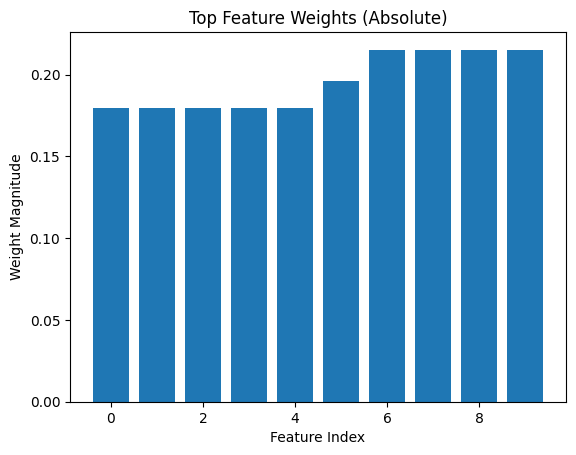

In [ ]:

# --- Day 20: Sentiment Pipeline (Mini Project) ---
data = {
    "text": [
        "Amazing camera and excellent battery life",
        "Very poor quality and slow performance",
        "Great value for money highly recommend",
        "Not worth it screen is dull and laggy",
        "Love this phone super fast and smooth",
        "Worst device ever waste of money",
        "Battery lasts long and the photos are sharp",
        "Terrible support and buggy software",
        "Fantastic experience would buy again",
        "Disappointed with the camera and speed"
    ],
    "label": [1,0,1,0,1,0,1,0,1,0]
}
df = pd.DataFrame(data)
df['text_clean'] = df['text'].str.lower()

X_train, X_test, y_train, y_test = train_test_split(df['text_clean'], df['label'], test_size=0.3, random_state=0, stratify=df['label'])

vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
Xtr = vec.fit_transform(X_train)
Xte = vec.transform(X_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(Xtr, y_train)
pred = clf.predict(Xte)

print("Accuracy:", round(accuracy_score(y_test, pred), 3))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

# Show top features by coefficient magnitude
coefs = clf.coef_[0]
feature_names = np.array(vec.get_feature_names_out())
top_idx = np.argsort(np.abs(coefs))[-10:]
top_features = feature_names[top_idx]
top_values = coefs[top_idx]

plt.figure()
plt.bar(range(len(top_features)), np.abs(top_values))
plt.title("Top Feature Weights (Absolute)")
plt.xlabel("Feature Index")
plt.ylabel("Weight Magnitude")
plt.show()



---
### Practice Exercises
1. **Day 16:** Switch to `ngram_range=(1,3)` in TF-IDF. Do top words change?
2. **Day 17:** Add 5 more custom reviews to balance classes. Does accuracy improve?
3. **Day 18:** Try `C=0.5` in Logistic Regression. How do metrics change?
4. **Day 19:** Increase epochs to 10 and test temperatures 0.5 vs 1.0 in generation.
5. **Day 20:** Add StopWord filtering and compare accuracy.

*Generated on:* 2025-10-02 11:14:16
